In [7]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#configuring the path of kaggle file .json type
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Importing Face Mask Dataset

In [9]:
# using API to fetch dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
# extracting the dataset from its compressed format
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [11]:
#importing the basic libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [12]:
with_maskFiles=os.listdir('/content/data/with_mask')
print(with_maskFiles[0:10])

['with_mask_1460.jpg', 'with_mask_1212.jpg', 'with_mask_3112.jpg', 'with_mask_3526.jpg', 'with_mask_498.jpg', 'with_mask_3506.jpg', 'with_mask_3379.jpg', 'with_mask_181.jpg', 'with_mask_1571.jpg', 'with_mask_3510.jpg']


In [13]:
without_maskFiles=os.listdir('/content/data/without_mask')
print(without_maskFiles[0:10])

['without_mask_3637.jpg', 'without_mask_1213.jpg', 'without_mask_2409.jpg', 'without_mask_2869.jpg', 'without_mask_755.jpg', 'without_mask_2974.jpg', 'without_mask_3313.jpg', 'without_mask_1419.jpg', 'without_mask_3278.jpg', 'without_mask_1068.jpg']


In [14]:
print("Number of Images with Mask : ",len(with_maskFiles))
print("Number of Images without Mask : ",len(without_maskFiles))

Number of Images with Mask :  3725
Number of Images without Mask :  3828


#### Creating Labels for the two distinguishing classes present
- Allot with mask person as 1
- Allot without mask person as 0

In [15]:
with_maskLab=[1]*3725
without_maskLab=[0]*3828 #or just use len() function

In [16]:
labels=with_maskLab+without_maskLab
print("With Mask : ",with_maskLab[0:5],"Length : ",len(with_maskLab))
print("Wihtout Mask : ",without_maskLab[0:5],"Length : ",len(without_maskLab))

With Mask :  [1, 1, 1, 1, 1] Length :  3725
Wihtout Mask :  [0, 0, 0, 0, 0] Length :  3828


#### Displaying the Images

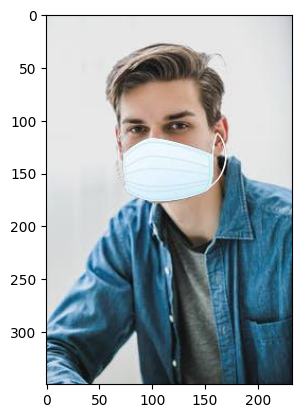

In [17]:
# Displaying images that has masks
img1= mpimg.imread('/content/data/with_mask/with_mask_758.jpg')
imgplot=plt.imshow(img1)
plt.show()

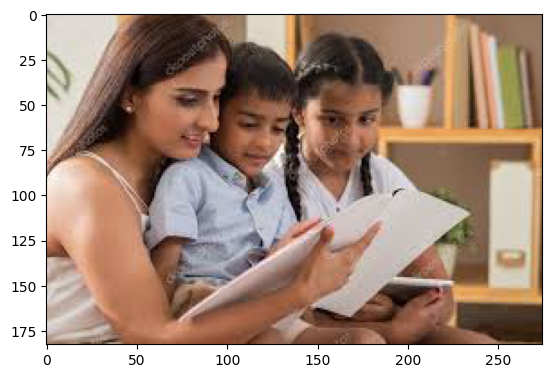

In [18]:
# Displaying images that has no masks
img2= mpimg.imread('/content/data/without_mask/without_mask_1452.jpg')
imgplot=plt.imshow(img2)
plt.show()

We observe that there is a huge mismatch in sizes that might interrupt our processing

#### Image Processing
- Resize the images
- Convert the images into NumPy arrays

In [19]:
#Convert images into numpy arrays
with_maskPath='/content/data/with_mask/'
data=[]
for img_file in with_maskFiles:
  image=Image.open(with_maskPath+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB') #to handle black and white images present in the set
  image=np.array(image)
  data.append(image)

without_maskPath='/content/data/without_mask/'
for img_file in without_maskFiles:
  image=Image.open(without_maskPath+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB') #to handle black and white images present in the set
  image=np.array(image)
  data.append(image)


- The first line defines a variable `with_masksPath` as the path to the folder containing the images with masks.

- The second line creates an empty list data that we will fill with NumPy arrays of the images.

- The for loop iterates through all the image files in the with_maskPath folder.
Inside the loop, we open each image using the `Image.open()` method from the Pillow library.

- After resizing the images to a uniform size, we use the `RGB` function to convert the image to the RGB color space using the `.convert()` method from the Pillow library. Some images may be in a different color space, so converting them to RGB ensures that all the images have the same format.

- The resulting Image object is then converted to a NumPy array using the .`array()` method.

- The resulting NumPy array is then appended to the data list.

In [20]:
print("Length of Data : ",len(data))
print("Type of Data :  ",type(data))

Length of Data :  7553
Type of Data :   <class 'list'>


In [21]:
data[145] #these be the pixel values, just for example purpose
'''Where the number in the array ranges from 0-255 defining the color present in
that particular cell/pixel, 0 means black, 255means Red based on RGB scale'''

'''A value of 0 means that the component is not present at all, and the color is completely absent.
A value of 255 means that the component is fully present, and the color is at 
its maximum intensity.'''

'A value of 0 means that the component is not present at all, and the color is completely absent.\nA value of 255 means that the component is fully present, and the color is at \nits maximum intensity.'

In [22]:
data[145].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy array
x=np.array(data)
y=np.array(labels)
print("Shape : ",type(x),type(y))
print("Type : ",x.shape,y.shape)

Shape :  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Type :  (7553, 128, 128, 3) (7553,)


#### Train Test Split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print("X : ",x.shape,", X Train : ",x_train.shape,", X Test : ",x_test.shape)

X :  (7553, 128, 128, 3) , X Train :  (6042, 128, 128, 3) , X Test :  (1511, 128, 128, 3)


In [26]:
x_train[0]

array([[[232, 233, 228],
        [232, 233, 228],
        [232, 233, 228],
        ...,
        [231, 231, 221],
        [231, 231, 221],
        [231, 231, 221]],

       [[232, 233, 228],
        [232, 233, 228],
        [232, 233, 228],
        ...,
        [231, 231, 221],
        [231, 231, 221],
        [231, 231, 221]],

       [[232, 233, 228],
        [232, 233, 228],
        [232, 233, 228],
        ...,
        [231, 231, 221],
        [231, 231, 221],
        [231, 231, 221]],

       ...,

       [[163, 155, 168],
        [179, 171, 183],
        [173, 165, 177],
        ...,
        [222, 231, 236],
        [222, 231, 236],
        [223, 230, 236]],

       [[174, 166, 179],
        [158, 150, 163],
        [169, 161, 174],
        ...,
        [222, 231, 236],
        [222, 231, 236],
        [223, 230, 236]],

       [[226, 223, 234],
        [218, 205, 220],
        [177, 174, 186],
        ...,
        [222, 231, 235],
        [222, 232, 235],
        [222, 231, 235]]

In [27]:
# Scaling the data for better performance
x_trainScaled=x_train/255
x_testScaled=x_test/255
'''To range the pixel color value to range between 0 and 1'''

'To range the pixel color value to range between 0 and 1'

In [28]:
# Lets take a look into one data for the color schema change
x_trainScaled[0]

array([[[0.90980392, 0.91372549, 0.89411765],
        [0.90980392, 0.91372549, 0.89411765],
        [0.90980392, 0.91372549, 0.89411765],
        ...,
        [0.90588235, 0.90588235, 0.86666667],
        [0.90588235, 0.90588235, 0.86666667],
        [0.90588235, 0.90588235, 0.86666667]],

       [[0.90980392, 0.91372549, 0.89411765],
        [0.90980392, 0.91372549, 0.89411765],
        [0.90980392, 0.91372549, 0.89411765],
        ...,
        [0.90588235, 0.90588235, 0.86666667],
        [0.90588235, 0.90588235, 0.86666667],
        [0.90588235, 0.90588235, 0.86666667]],

       [[0.90980392, 0.91372549, 0.89411765],
        [0.90980392, 0.91372549, 0.89411765],
        [0.90980392, 0.91372549, 0.89411765],
        ...,
        [0.90588235, 0.90588235, 0.86666667],
        [0.90588235, 0.90588235, 0.86666667],
        [0.90588235, 0.90588235, 0.86666667]],

       ...,

       [[0.63921569, 0.60784314, 0.65882353],
        [0.70196078, 0.67058824, 0.71764706],
        [0.67843137, 0

#### Building a Convolution Neural Network **(CNN)**

In [29]:
import tensorflow as tf
import keras 

In [30]:
numofClasses=2 # mask and without mask
model1=keras.Sequential()
model1.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128,activation='relu')) 
#here 32 64 128 defines the number of neurons in the particular layers
model1.add(keras.layers.Dropout(0.5)) #to reduce overfitting over layers
model1.add(keras.layers.Dense(64,activation='relu'))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(numofClasses,activation='sigmoid'))
#sigmoid used for binary classification

In [40]:
# compiling the neural network including optimization
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
#training our neural network
history=model1.fit(x_trainScaled,y_train,validation_split=0.1,epochs=10)
'''validation split is equivalent to train test split, here the main motive is
to, reduce the val_loss and increase the acc score
We see that epoch 9 has the max accuracy score'''

Epoch 1/10
170/170 [==============================] - 5s 19ms/step - loss: 0.0592 - acc: 0.9801 - val_loss: 0.3881 - val_acc: 0.9372
Epoch 2/10
170/170 [==============================] - 4s 22ms/step - loss: 0.0619 - acc: 0.9783 - val_loss: 0.4784 - val_acc: 0.9256
Epoch 3/10
170/170 [==============================] - 3s 20ms/step - loss: 0.0517 - acc: 0.9829 - val_loss: 0.3817 - val_acc: 0.9289
Epoch 4/10
170/170 [==============================] - 3s 19ms/step - loss: 0.0443 - acc: 0.9846 - val_loss: 0.4596 - val_acc: 0.9355
Epoch 5/10
170/170 [==============================] - 4s 22ms/step - loss: 0.0488 - acc: 0.9833 - val_loss: 0.4556 - val_acc: 0.9207
Epoch 6/10
170/170 [==============================] - 5s 28ms/step - loss: 0.0599 - acc: 0.9818 - val_loss: 0.2916 - val_acc: 0.9355
Epoch 7/10
170/170 [==============================] - 4s 22ms/step - loss: 0.0521 - acc: 0.9814 - val_loss: 0.4216 - val_acc: 0.9289
Epoch 8/10
170/170 [==============================] - 4s 21ms/step - 

'validation split is equivalent to train test split, here the main motive is\nto, reduce the val_loss and increase the acc score\nWe see that epoch 9 has the max accuracy score'

#### Model Evaluation

In [41]:
loss, accuracy=model1.evaluate(x_testScaled,y_test)
print('Test Accuracy : ',accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.3316 - acc: 0.9471
Test Accuracy :  0.947054922580719


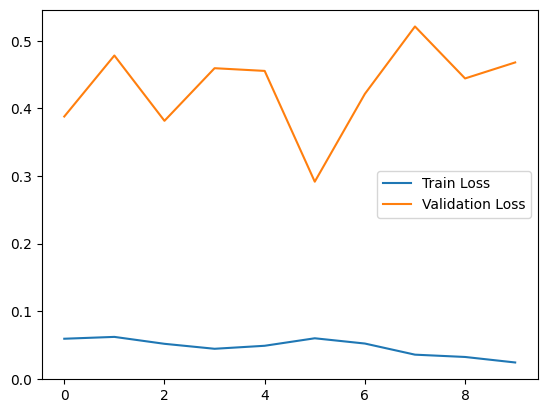

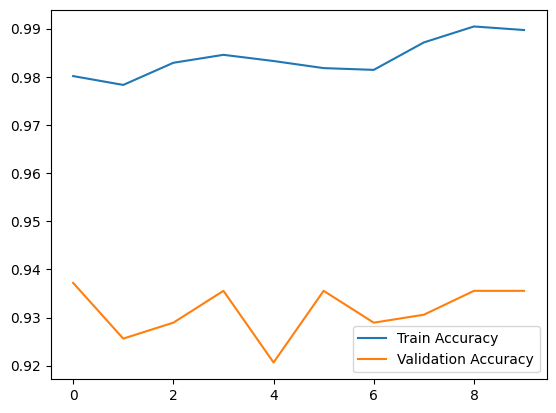

In [42]:
h=history
#to plot the loss value
plt.plot(h.history['loss'],label='Train Loss')
plt.plot(h.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

#to plot the validation value
plt.plot(h.history['acc'],label='Train Accuracy')
plt.plot(h.history['val_acc'],label='Validation Accuracy')
plt.legend()
plt.show()

#### Predictive System to detect the presence of Mask

Enter the Image Path : /content/mask_istock.jpg


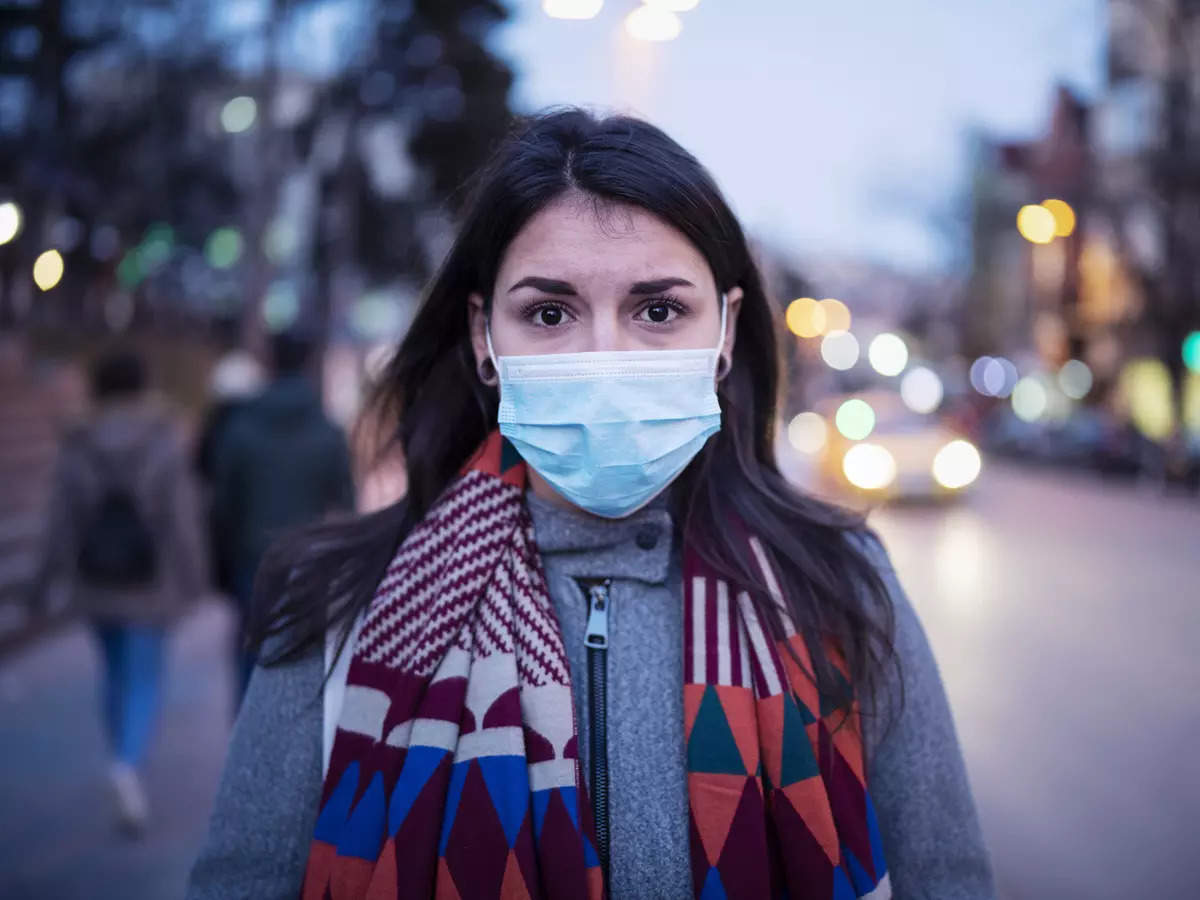

1/1 [==============================] - 0s 219ms/step
[[0.11849517 0.99907994]]
1
The Person is Wearing A Mask


In [43]:
input_imagePath=input("Enter the Image Path : ")
input_image=cv2.imread(input_imagePath)
cv2_imshow(input_image)
input_imageResized=cv2.resize(input_image,(128,128))
input_imageScaled=input_imageResized/255
input_imageReshape=np.reshape(input_imageScaled,[1,128,128,3])
input_prediction=model1.predict(input_imageReshape)
print(input_prediction)

input_predLabel=np.argmax(input_prediction)
print(input_predLabel)

if(input_predLabel==1):
  print("The Person is Wearing A Mask")
else:
  print("The Person is not wearing a Mask")


Enter the Image Path : /content/shutterstock_648907024.jpg


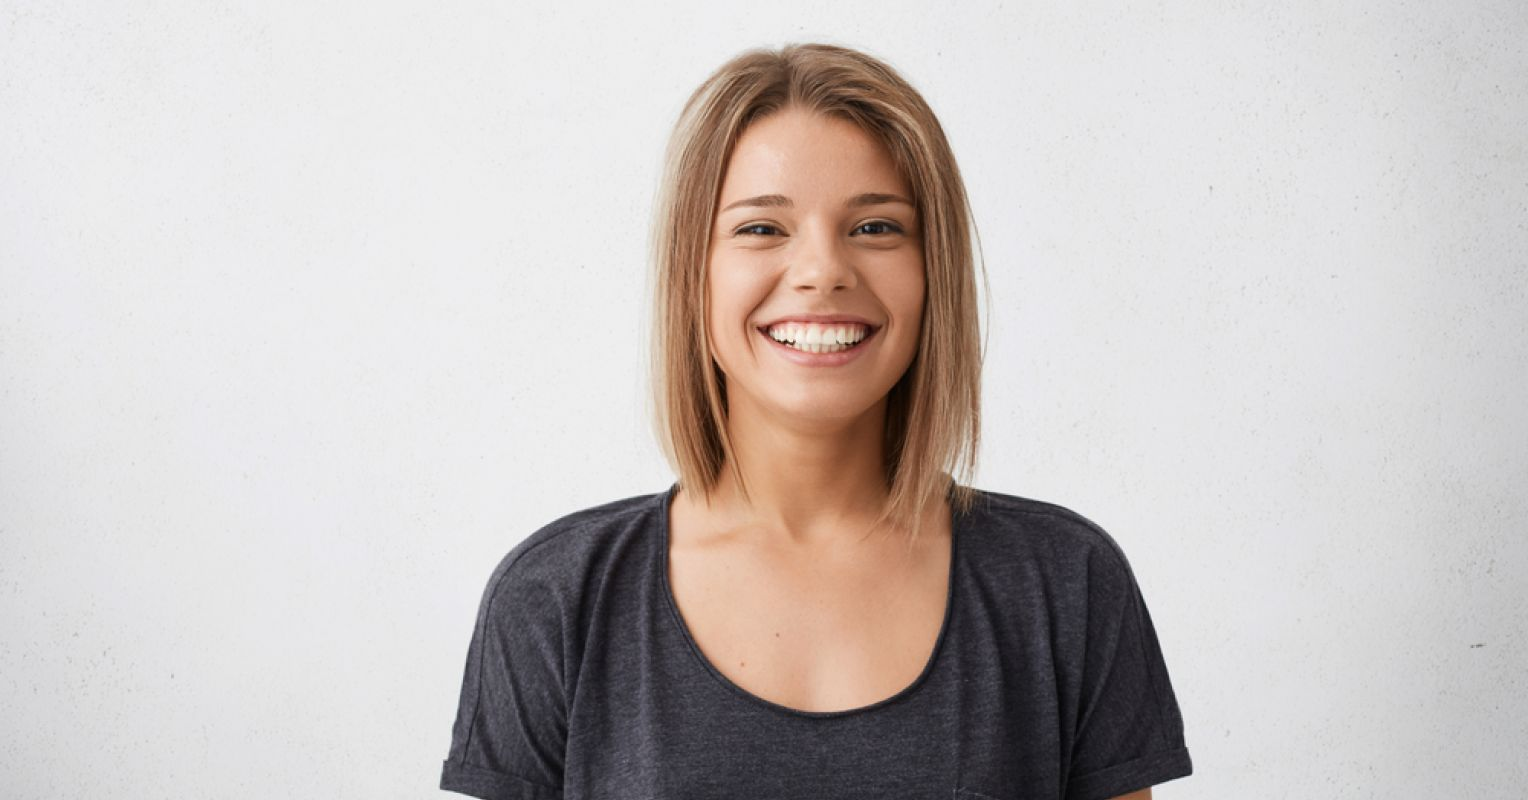

1/1 [==============================] - 0s 30ms/step
[[0.699507 0.568808]]
0
The Person is not wearing a Mask


In [45]:
input_imagePath=input("Enter the Image Path : ")
input_image=cv2.imread(input_imagePath)
cv2_imshow(input_image)
input_imageResized=cv2.resize(input_image,(128,128))
input_imageScaled=input_imageResized/255
input_imageReshape=np.reshape(input_imageScaled,[1,128,128,3])
input_prediction=model1.predict(input_imageReshape)
print(input_prediction)

input_predLabel=np.argmax(input_prediction)
print(input_predLabel)

if(input_predLabel==1):
  print("The Person is Wearing A Mask")
else:
  print("The Person is not wearing a Mask")

#### Turning the above into a function to increase Reusability

In [55]:
def predict_mask(image_path, model):
   input_imagePath=input("Enter the Image Path : ")
   input_image=cv2.imread(input_imagePath)
   cv2_imshow(input_image)
   input_imageResized=cv2.resize(input_image,(128,128))
   input_imageScaled=input_imageResized/255
   input_imageReshape=np.reshape(input_imageScaled,[1,128,128,3])
   input_prediction=model1.predict(input_imageReshape)
   print(input_prediction)
   input_predLabel=np.argmax(input_prediction)
   print(input_predLabel)
   if(input_predLabel==1):
     print("The Person is Wearing A Mask")
   else:
     print("The Person is not wearing a Mask")

Enter the Image Path : /content/shutterstock_648907024.jpg


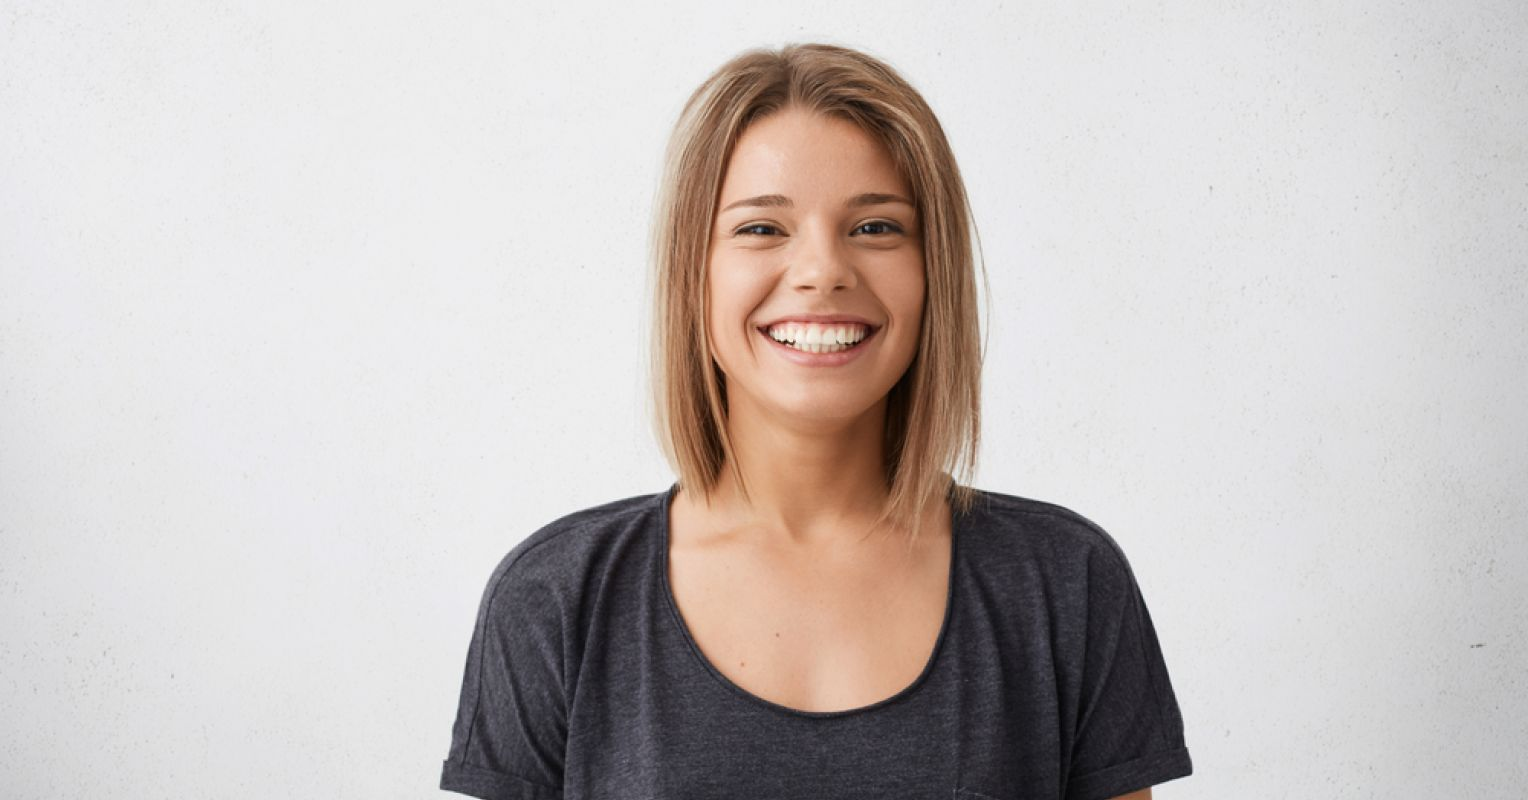

1/1 [==============================] - 0s 33ms/step
[[0.699507 0.568808]]
0
The Person is not wearing a Mask


In [57]:
predict_mask(input_image_path, model1)

Enter the Image Path : /content/mask_istock.jpg


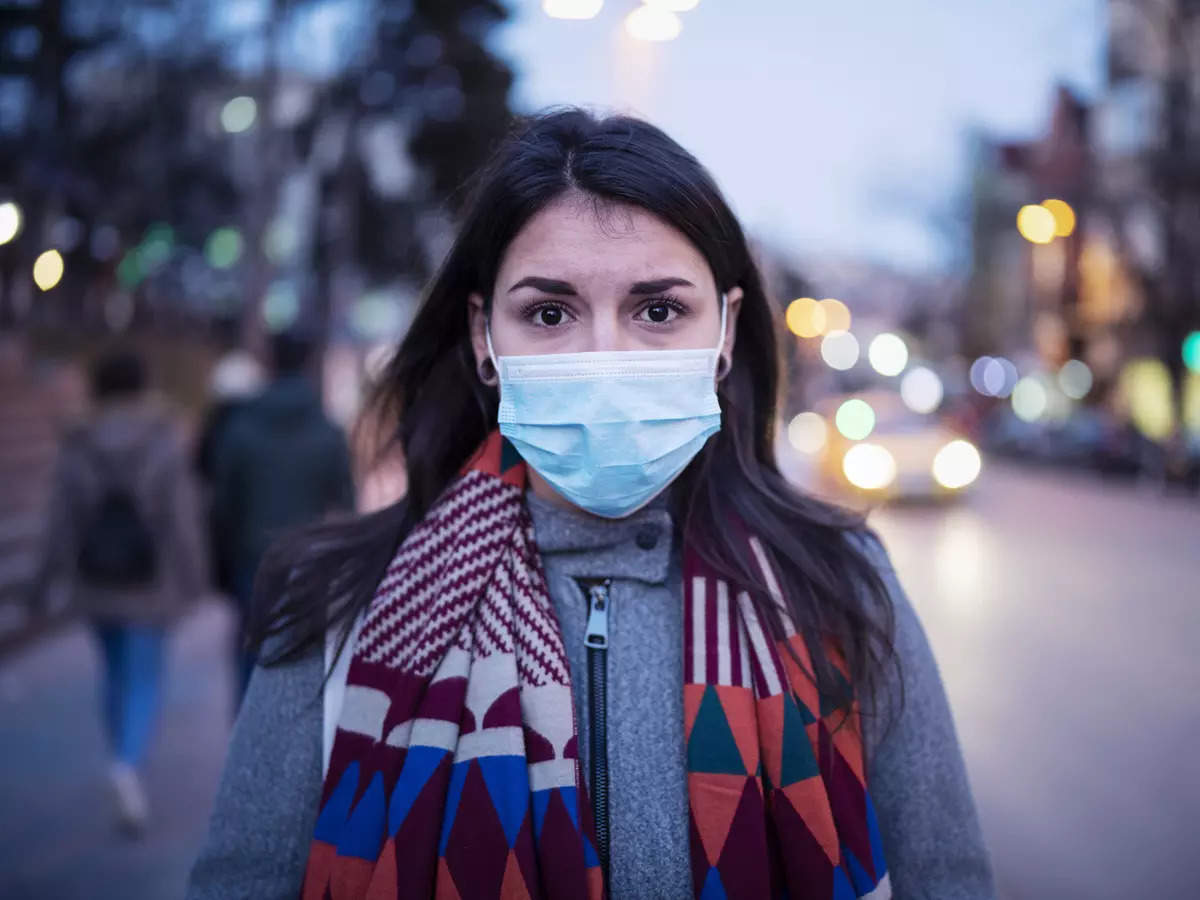

1/1 [==============================] - 0s 30ms/step
[[0.11849517 0.99907994]]
1
The Person is Wearing A Mask


In [60]:
predict_mask(input_image_path, model1)

In conclusion, the mask detection model we have developed is not 100% perfect in detecting whether a person is wearing a mask or not. There could be several reasons why the model is not performing at its best, including the quality of the dataset used for training, the complexity of the task itself, and the limitations of the machine learning algorithms used. However, we believe that the model can be improved with more resources and feeds. With a larger dataset, more complex algorithms, and more computing power, the model can be fine-tuned to achieve higher accuracy in detecting masks. Nevertheless, the current version of the model can still be useful in identifying individuals who are not wearing masks, and can potentially be integrated into various applications and systems to promote public health and safety.